### Road Map

1. Docker installation
2. Docker Baics
3. Container Basics
3. Image Basics
4. Docker Networking
5. Docker Volumes
6. Docker Compose
7. Orchestration
8. Docker Swarm
9. Kubernetes
10. Swarm vs K8s
11. Common Q&A

### Why Docker

* It is next major infrastructure shift that everyone must adapt. By 2020, more than 50% global organization will be running containers in production.
* Docker is all about speed. Develop faster, build faster, test faster, deploy faster, update faster, recover faster.
* **Today for a software to work, multiple applications are involved like frontend, backend, db, middle tier, that all need to work together too run software, which all have different requirement.**
* The way containers do it, package everything the same way regardless of the system, distribute the software regardless of system. They all run the same way fundamentally when they use docker.
* Docker is core of a big landscape. There are many more application which are based on docker.(landscape.cncf.io). Before that you must learn docker.

### Container vs VM
**Container**
1. Containers are nothing like Mini-VM's, They are just processes isolated from the system.
2. Containers are built for running applications. container have image which provide all necessary files to run application.
3. Container share the host OS kernel. Container stops when application inside it stops.

**Virtual Machine**
1. They are made of user space plus kernel space for OS.
2. Under VM, hardware is virutalized. Each VM has OS and its files. They share hardware.
3. Running a virtual machine on top of hypervisor is very resource consuming. There is multiple copies of OS in the system.

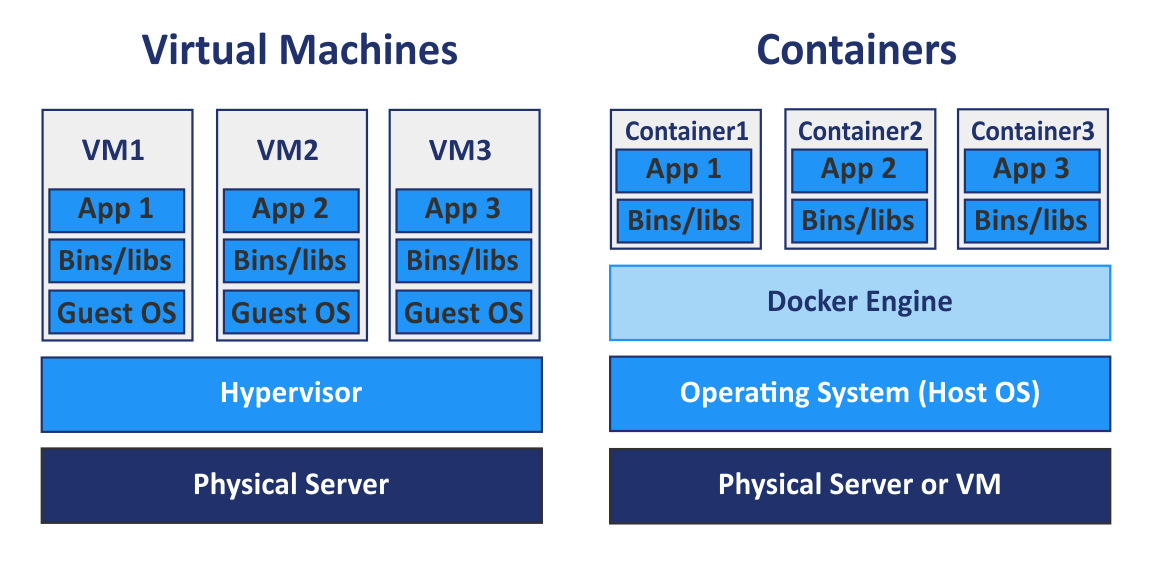

### Docker Installation

* There are dozens edition of Docker for different OS. (Visit store.docker.com)
* We will use Docker CE (Commumity Edition). Three major types of installs. Direct, Mac/Win, Cloud.
* Docker EE (Enterprise Edition) is paid with lots of benefits like extra support, extra products etc.
* Edge is beta release while stable is stable release which is released per quarter.
* **In Linux, Docker uses kernel features. It does not use any hypervisor.**
* **In Windows and Mac run a Linux virtual machine on Hypervisor and that linux run docker on it.** Windows uses Hyper-V and Mac uses Apple Hypervisor.

**For Windows**
1. Go to Docker store and install "Docker for Windows"
    
**For Linux**
1. Do not use ** apt/yum install docker.io ** because they are old and not official built packages.
2. There is a automated script (https://get.docker.com) which can install all dependencies. ** curl -fsSL https://get.docker.com -o get-docker.sh | sh get-docker.sh ** (Edge release)
3. Else visit store.docker.com has instruction for each distro.

**Just for trial**
1. Visit https://labs.play-with-docker.com/ to try docker commands, you can even create clusters.
    
### Types of Containers
1. Linux Container (default)
2. Windows Container (released in 2016)

Concepts of both of these containers are same. Except binaries running inside these containers may be different.

### After Installation (Linux)
* If you want to run docker as not-root user (w/o sudo), add username to docker group. ** sudo usermod -aG docker &lt;username&gt; **. Don't do if you dont trust user.
* Install docker-machine and docker-compose. Use https://github.com/docker/machine/releases and https://github.com/docker/compose/releases to do check latest verison and methods.
* Install git and git clone https://github.com/BretFisher/udemy-docker-mastery
* Install vscode as a text editor. (depend on user) | Install docker extension

#### Commands Basics
* ** docker version ** returns version of client (local) and server or engine(service/deamon). Ideally they are same. It validates that we can talk to server.
* ** docker -info ** it returns more details like number of containers, images.
* ** docker ** to get list of all commands
* There are hundreds of commands, so docker categorized them into categories (management). ** docker COMMAND SUBCOMMAND (options) **. However, old ** docker COMMAND (options) ** still works. But as new feature will come it will not be in older format.

### Image vs Container
* An Image is the application we want to run, while a container is an instance of the image running as a process.
* You can have many containers running off the same image. Docker's default image "registry" is called Docker Hub. (hub.docker.com)

### Container Basics
* ** docker container run --publish 80:80 --detach nginx **. 
* In background docker engine looked for an image nginx and pulled latest version from Docker Hub and started as a new process in new container.
* Opened port 80 on host IP and routes the traffic to container, port 80. You will get a "bind" error if left number (host part) is being used by anything else (even another container). 
* **--detach/-d** tells to run it in the background. It will return container id. **--publish/-p** to assign ports.
* ** docker container ls ** to list all **running** containers. 
* ** docker container stop &lt;container&gt; ** to stop container. It could be first few unique digits of id to identify container. It could be a container name also.
* ** docker container start &lt;container&gt; ** to start stopped container again.
* ** docker container ls -a ** to list all container even stopped one. 
* There will show a name in the end, if we dont assign ourself it will create random name.  
** docker container run --publish 80:80 --detach --name webhost nginx **
* ** docker container logs &lt;CONTAINER&gt; ** to view logs generated in that container.
*  ** docker container top/ps &lt;CONTAINER&gt; ** to view process running inside container.
* ** docker container rm -f &lt;C1&gt; &lt;C2&gt; &lt;C3&gt; ** to remove container C1, C2, C3. **-f** means force, which stops and remove container, if it is still running.
* ** docker container inspect ** details of one container config. Gives metadata about the container.
* ** docker container stats ** live performance stats of all containers.
* ** docker container run -d --name mysql -e MYSQL_RANDOM_ROOT_PASSWORD=true mysql **, use **-e/--env** to set environemnt varaible. You can see password in logs.

**What happens when we run a container?**
1. Look for image locally in image cache, doesnt find anything.
2. Then look in remote image repo (docker hub), We can specify version like (nginx:latest by default)
3. Create new container based on image and prepare to start. Gives virual IP on private network inside docker engine.
4. Opens up port 80 on host and forward to port 80 in container.
5. Starts container by running the CMD in the image Dockerfile.
6. Container run as long as the CMD is running. You can assign CMD manually as below.

eg. ** docker container run --publish 8080:80 --name webhost -d ngnix:1.11 nginx -T **

**Getting a Shell of Container**
1. No need of ssh, docker cli is great substitute for adding SHH to container,
2. **docker container run -it --name ubuntu ubuntu bash **, here **-i** means --interative keep stdin open even if not attached, **-t** means --tty allocate a pseudo-TTY.
3. When we exit the bash, container will stop because bash is stopped, means "CMD" is stopped.
4. To start stopped container with interactive shell use ** docker container start -ai ubuntu bash **.
5. ** docker container exec -it ubuntu bash ** to run additional command inside a running container interactively. Here we are running bash interactively.

### Docker Networking
1. **All the containers in the docker are on a virtual network (default "bridge/docker0")**. All containers which are interacting with each other should be on same network. Otherwise they have to interact using host.
2. **All network on a virtual network can talk to each other without exposing port (-p) to the host.**
3. Each virtual network route through NAT firewall on host IP.
4. For example mongo container and nodejs container are on network called docker0 while mysql and httpd are on network named docker1. mongo and nodejs can interact with each other without exposing their port to host. But nodejs cannot interact with mysql because they are on different network.
5. If mongo is not exposing port to host, but nodejs is doing so. We can connect to mongo via nodejs.
6. **host** is another network (other than bridge/docker0) which gains performance by skipping virtual networks but sacrifices security of container model.
7. **none** is another network which leaves us with localhost interface in container and not attached to anything.
8. Network drivers (bridge, host, none) are 3rd party extentions that give you virtual network features.

**Some basic commands**
1. To view which port is exposed in container to which port in host, use- **  docker container port &lt;container&gt; **. 
2.  To view ip address of a container. ** docker container inspect --format  '{{.NetworkSettings.IPAddress}}` <container>  **.

**Docker Networking commands**
1. See all virtual networks **  docker network ls  **. By default there are 3- bridge, host, none. 
2. Using **  docker network inspect &lt;network&gt;  **. we can view all containers connected to bridge, their Ip address.
3. Create a network **  docker network create &lt;network&gt;  **. We can specify **--driver** (default "bridge") whicle creating network.
4. While creating a container we can specify network we want container to attach as **  docker container run -d --name &lt;container&gt; --network &lt;network&gt; nginx  **
5. We can dynamically create a NIC in container on an existing virtual network and connect it to different virtual network. **  docker network connect &lt;network&gt; &lt;container&gt; **. Now new_nginx container is on two virual network.
6. Similar we can disconnect also. **  docker network disconnect &lt;network&gt; &lt;container&gt;  **
7. **Docker defaults the hostname of container to the container's name but we can set aliases. So that we do not have to rely on ip address for communitcation**

**Tips**
1. Always use custom network instead of default "bridge"
2. Container should not rely on IP's for intercommunication, so use the hostname.
3. Assign network-alias while creating container, and create multiple same container with differnet name but same network-alias, these containers will respond to requests in round robin fashion. **  docker container run --name &lt;container&gt; --network &lt;network&gt; --network-alias search elasticsearch:2  **.

### Container Images
1. **It is application binaries, dependencies for application and metadata on how to run the image.**
2. Official definition: "An image is an ordered collection of root filesystem changes and the corresponding execution parameters for use withing container runtime."
3. **Not a complete OS. No kernel, kernel modules (e.g. drivers). Only just binaries needed for application. Host provide the kernel.**
4. It can be as small as one file (your app binary) or as big as Ubuntu distribution with apt, apache and more.

**Docker Hub**
1. https://hub.docker.com contains millions of official as well as public images. You can also put your images and set it as public or private. You can search on the top.
2. Official Images are created by docker teams who are working with official team of application. Tags refer to version of image. To pull/update the version of image use **  docker pull &lt;image&gt;:&lt;tag&gt; **
3. There are public images like Github, which are often created by other people and sometime organization. A good public image can be determind by stars and pulls.
4. Images do not have a name, it is repository. Since we are dealing with official repository than it is just a `<repository>:<tag>`. But public images are `<username>/<repository>:<tag>`. From now on `<IMAGE>` means `<username>/<repository>:<tag>`.

**Image Layers**
1. Image is not a huge blob of data that come and go. Images are made up of file system changes and metadata.
2. **  docker image history &lt;image&gt;  ** **It gives history of image layer**. It starts from a blank layer called scratch. Every change add a layer. Example. you start with a ubuntu image, install something using apt and changed a env variable. So there are 3 layer, 1st layer with ubunut, 2nd with apt package install, 3rd with env variable change.
3. Every layer has a unique SHA, so when we are pulling some image, docker identifies which layers to pull using SHA, so there is save lot of time and space. Docker only stores unique layers which can be identified by SHA.
4. When we start a new container for a image, it copies files/changes from that image in container and then make changes to its files. **It is called Copy-On-Write(CoW)**.

**Images Commands**
1. **  docker image inspect  ** gives metadata about image, like exposed ports, CMD etc.
2. **  docker image ls  ** gives list of all images currently on system.
3. We can assign a new tag, or new repository name to image. **  docker image tag SOURCE_IMAGE[:tag] TARGET_IMAGE[:tag]  **
4. We can push our new repository as we do it in github. **  docker image push &lt;IMAGE&gt;  **. But to do that, use **  docker login  ** to login to your account.

**Dockerfile and building Dockerfile**
1. It is receipe for creating images.
2. It looks like a shell script but it is not. Its totally different language. Each command is a different layer.
3. The first layer is for base linux distribution. e.g. **FROM debian:jessie** People now generally use Alpine as base distribution because of small size.
4. **WORKDIR** command is to change working directory.
5. **COPY** command is to copy file from local dir to image cwd. `COPY file file`
4. **ENV** command is to set enviornment variable.
5. **RUN** command is to execute shell command. It is generally used to install packages, unzip, file edits etc.
6. **EXPOSE** command is to expose port of container to virtual network, by default no udp/tcp port is exposed to virtual network. However, it will not automatically open on host, we anyway have to use --publish/-p.
7. **CMD** is required parameter which is final command to run everytime you launch a new container.
8. Put this Dockerfile in the a directory (dir) and change pwd to dir. run **  docker image build -t REPO_NAME -f Dockerfile .  **. It will execute all commands one by one, assign a sha after each command (layer sha).
9. Now if I change something in the middle. It will not run from starting it will run all things after the layer which is changed. A change in middle layer will cause change of sha of all after layers.
10. **So we should keep the things that changes least on top of Dockerfile and things which changes most on bottom of Dockerfile.**
11. After you image is working good. Give it a tag- **  docker image tag my_image adityajn105/my_image:latest  **. And push it **  docker image push adityajn105/my_image:latest  **.

**Tips for Dockerfile**
* Make logs all things to stdout/stderr. instead of files.
* **Document everything** for each area of Dockerfile.
* Add VOLUME for logs, user files.
* Dont use latest tag, **use version** always.
* Also use version of apt-get packages. **Pin your versions**
* Use ENTRYPOINT for all runtime configurations.

### Container Lifetime and Persisting Data
1. Containers are usually immutable and ephemeral.
2. Suppose there is a new version of image, we will just remove old container and create new container from new image. But what about data/files generated in old container?
3. Docker does not mix up your data with the application binaries.
4. Docker keeps data/files in the container unless we remove the container. **This is known as persistent data.**
5. There are two ways to resolve this issue. **Volumes** and **Bind Mounts**
6. **Volumes**: make special location outside of container UFS.
7. **Bind Mounts**: link container path to host path.

**Persisting Data : Volumes**
1. If you go to official mysql Dockerfile, there will be VOLUME command, it specifies location (\var\lib\mysql) of default mysql databases. It tells container to create a volumne location ans assign it to this directory.  
2. Any files we put in this volume will outlive the container. When we remove a container it will not remove volume, we have to remove it manually, there is an extra step.
3. When you do ** docker image inspect mysql**, you will see a Volume specified. Now lets run a mysql container **docker container run -d --name mysql -e MYSQL_ALLOW_EMPTY_PASSWORD=True mysql**. If we inspect mysql container, we will also see Mounts which is running container getting its own unique location on host to store data, in background it is mapped to container. 
4. ** docker volume ls ** to see all volume. We can also do ** docker volume inspect <volume>** to see details about volume (default volume names are SHA). However there is no easy way to find which volume belongs to which container. But using container inspect we can find out.
5. Suppose you have mutiple container and multiple volumes, and you removed all containers. Now you cant insepct container. How will you know which volume belonged to which container?
6. To get around that we use **named volume**. We can use **-v** which allow us to specify new volume or existing volume. ** docker container run -d --name mysql -e MYSQL_ALLOW_EMPTY_PASSWORD=True -v mysql-db:/var/lib/mysql mysql **. Now, ** docker volume ls ** will give volume name instead of SHA.

**Persisting Data : Bind Mounting**
1. Maps a host file or directory to a container file or directory.
2. It same as Volumes skips UFS and host file overwrites any in container.
3. It cannot be specified in Dockerfile, must be used during like ** docker container run -it --name nginx -v /home/aj/html:/usr/share/nginx/html nginx **
4. What ever you create in host html will appear inside container html and vis-versa. Actually both are same folder, however pointers are different but pointing to same location.

### Docker Compose
* Most of our applications are not standalone. So there are multiple docker containers to do that, for example there could be mysql, frontend, backend etc. Docker compose make configuring them easier.
* **save docker run settings in easy to read file, create one liner development environment.**
* It has two components: 1. **YAML config file**  2. **docker-compose**

```
#Yaml template
version: '3.1' #if no version specified v1 is assumed, recommend v2 minimum

services: #containers, same as docker run
	servicename: #a frindly name, this is also DNS name inside network
		images: #optional, if you use build
        build: #option if you use image
           context: #directory
           Dockerfile: #name of dockerfile
		command: #optional, replace the default CMD specified by the image
		environment: #Optional, same as -e in docker run
		volumes: #Optional, same as -v docker run
        depends_on: #optinal, to give service dependency
        networks: #Optional, to assign networks
	servicename2:

volumes: #Optional, same as docker volume create
networks: #optional, same as docker network create
```
* docker-compose cli needs to be downloaded seperately for linux version of docker.
* It is not a production grade tool, but to be used for dev-test.
* Two common commands are: 
    1. **  docker-compose up -f file_name ** to setup whole enviroment
    2. **  docker-compose down  ** to remove whole enviroment excluding vol/net, to remove volume put -v.

### Docker Swarm
1. To automate container lifecycle
2. To easily scale out/in/up/down
3. To ensure container are re-created if they fail.
4. Replace container without downtime.
5. control/track where containers get started.


**Swarm Mode**
1. Swarm mode is a clustering solution built inside Docker.
2. By default swarm mode is unabled in docker, to enable it ** docker swarm init** .
3. ** docker service create alpine ping 8.8.8.8** , create a service which pings google DNS. (this is similar to docker run)
4. ** docker service ls**  lists all services, REPLICAS is total_running/total_required_to run
5. ** docker service ps &lt;service&gt;** , will show task and containers for service, it also shows node which shows on which machine it is running.
6. **docker service update --replicas 3 &lt;service&gt;** to update somthing about service. here we are incresing replicas. We have a lot of options in there, swarm does it in blue/green pattern. It will update container one at a time, without interupting the service. If you remove a container for a service, swarm will create reate another one.
7. **docker service update --image myapp:1.2.1 &lt;serivce&gt;** is most update that people do. Similarly you can add/remove ports.
8. ** docker service rm &lt;service&gt;**  will remove the service.

**Creating a swarm cluster using multiple machine (now 3)**
1. Make sure all machines (node1, node2, node3) are accessible.
2. In cloud services swarm init requires ip-address (public ip) to advertise swarm service. ** docker swarm init --advertise-addr &lt;IP&gt;** . This will initialize machine as swarm manager.
3. We can add worker/manager in the initialized cluster using command given by ** docker swarm join-token manager** .
4. ** docker node ls**  will show all nodes to swarm manager in cluster. We cant use swarm commands in worker.
5. We can promote any worker to manager using ** docker node update --role manager node2** .
6. Now you can create services from manager, ** docker service create --replicas 3 alpine ping 8.8.8.8** . It will automatically distibute replicas in other machines.
7. Do **docker service ps**

**How to use swarm in workflow**
1. For multi-host networking we need to create network with 'overlay' driver. ** docker network create --driver overlay mynetwork** 
2. We can access any service using any node ip in the cluster. This is done by **routing Mesh**, rountes ingress (incoming) packets for a service to proper Task.
3. Rounting Mesh spans all nodes in Swarm, it also does load balancing across their tasks. Mesh creates a virual IP infront of service, to make sure load is distributed to all workers. This is ingress network.

**Stack: Production Grade Compose**
1. From 1.13, Docker adds a new layer of abstraction to swarms called stacks.
2. Stacks accept compose files as declarative definition for services, networks and volumes
3. We can't do build in compose for swarm.
4. In local machine, compose ignores deploy information, while in swarm it ignores any build information.
5. Stack is only for one swarm.
6. Stack file
```
version "3" # has to be atleast version 3 or higher
services: #declare all serivces inside it
   servicename: #use this name as DNS
       image: #name of your image
       ports:
           - "5000"
       networks:
           - network1 #network on which service exists
       volumes:
           - db-data: /var/lib/image/data
       deploy:
           replicas: 2 #no of replicas
           update_config:
               parallelism: 2
               delay: 10s
           restart_policy:
               condition: on-failure
           placement:
               constraints: [node.role == manager] #to specify some constraints
```
7. To deploy whole app, use **docker stack deploy -c exmaple-stack.yml myapp**
8. **docker stack ls** shows all stacks that are deployed
9. **docker stack ps myapp** shows all tasks name running in app
10. **docker stack services myapp** it shows all replicas for each service with its image.
11. You dont have to manually update services using commands, just change the yml file, and run this command ***docker stack deploy -c example-stack.yml myapp**

**Swarm Secrets**
1. Easiest "secure" solution for storing secrets in swarm.
2. A secret can be
    * username and passwords
    * TLS certificates and keys
    * SSH keys
    * and data you want not be on "front page of views"
3. Swarm Raft DB is encrypted on disk, only stored on disk of Manager Nodes and only manager have keys to unlock and decrypt it.
4. Secrets are first stored in Swarm, then assigned to a Service(s).
5. Only containers in assigned Service(s) can see them.

### Docker Heathchecks.
1. Much better option then to check "if binary is still running?"
2. It expects exit 0 (OK) or exit 1 (Error)
3. Three container states: starting, healthy, unhealthy
4. There are healthchecks options which should be specified, The health option will show up in **docker container ls** in status column (new information) and also in **docker container inspect** (last 5 health checks). 
5. Docker run does nothing with healthchecks.
6. services will replace tasks if they fail healthcheck. Service update wait for them before continuing.

### Container Registeries
1. An image registry need to be part of your container plan, its not optional.
2. We can build our own registry as private image store.
3. DockerHub is most popular public image registry. It also have lighweight image building. It can be linked to github/bitbuket for autobuilds.
4. Visit - https://github.com/veggiemonk/awesome-docker for more 

**Using a private registry**
1. It is just a http server running on port 5000 by default.
2. It is secure by default, it uses a TLS, Docker wont talk to registry without HTTPS except for localhost. For using insecure registry we have to enable "insecure-registry" in engine.
3. Docker provides a registry image, first run this image on host, **docker container run -d -p 5000:5000 --name registry registry**
4. Now tag your image as **docker image tag myapp 127.0.0.1:5000/myapp**
5. Now when you do **docker push 127.0.0.1:5000/myapp**, it will push to local image registry, not on dockerhub.
6. To pull image use **docker image pull 127.0.0.1:5000/myapp**
7. Registry image uses volumes to avoid image deletion, To see strcture how it stores images use mount binds. **docker container run -d -p 5000:5000 --name registry -v $(pwd)/registry-data:/var/lib/registry registry**
8. In swarm, run registry as a service. Because of routing Mesh, all nodes can see 127.0.0.1:5000, so we dont have to worry about TLS in swarm also.
9. To see all repositories in regisrty, visit **http://127.0.0.1:5000/v2/_catalog**

## Kubernetes
1. Popular Container Orchestrator
2. Orchestation means make many servers act like one.
3. Runs on top of Docker as a set of APIs in container. Provides API/CLI to manage container across servers.
4. Many clouds provide it for you. Many vendors make a "distribution" of it.

**Kubernetes vs Swarm**
1. Swarm is built in Orchestration in Docker.
2. Kubernetes and Swarm are both container orchestrators, both are solid platforms with backing.
3. Swarm: Easier to deploy/manage
4. Kubernetes: More features, flexibility and support.
5. You should know both.

**Advantages of Swarm over Kubernetes**
1. Comes with Docker, single vender container platform.
2. Easiest orchestrator to deploy/manage yourself.
3. Has 20% features of kubernetes but still solves 80% of use cases.
4. Runs anywhere Docker does. local, cloud, datacenter.
5. Secure by default.
6. Easier to troubleshoot, less things to manage.

**Advantages of Kubernetes over Swarm**
1. Cloud vendor will deploy/manage Kubernetes for you. Every cloud vendor love to support Kubernetes.
2. Infrastructure vendors are making their own distribution.
3. Widest adoption and community.
4. Flexible: Covers widest sets of use cases.
5. Trendy will benefit your career.

### Kubernetes Basics

**Common System Parts**
1. Kubernetes is the whole orchestration system. K8s/Kube is short form of Kuberenetes. 
2. **Kubectl** (cube control) : CLI to configure Kubernetes and manaage apps.
3. **Node**: Single server in the Kubernetes cluster.
4. **Kubelet**: Kubernetes agent running on node. (like container)
5. **Control Plane**: Set of containers that manage the cluster (like manager in swarm). Include API server, scheduler, control manager etc. Sometimes called master.
6. **Master**
    * set of master nodes are called control plane. They run on top of docker.
    * etcd container - It stores key, value pair. Like raft in swarm, uses same protocol.
    * API container - the way we talk to cluster to give orders.
    * Scheduler container - control how and where container are placed, and objects called pods.
    * Control Manager container- Looks state of whole cluster, and try to manage
    * Core DNS - Main DNS
    * More addons for volumes, networks etc
7. **Node**
    * Like worker in swarm.
    * kubelet container - agent runs on it
    * kuber-proxy - to manage networking.
  
**Installing Kubernetes**
1. Kubernetes is a series of container, CLI's and configuration
2. Many ways to install. We will focus on easiest for learning.
3. Docker Desktop is easiest way to install kubernetes. Sets up everyhing inside Docker's existing Linux VM.
4. Docker Toolbox on Windows, use **MiniKube**
5. For own linux host or VM, use **MicroK8s**, install kubernetes right on the OS. Instead of kubectl is uses microk8s.kubectl. So you add alias as alias kubectl=microk8s.kubectl
6. Kubernetes in a browser, https://play-with-k8s.com or https://katacoda.com.

**Kubernetes Container Abstraction**
1. **Pod**: One or more containers running together on one Node.
    * Basic unit of deployment. Containers are always in pods.
2. **Controller**: For creating/updating pods and other objects.
    * many types of controllers inc. Deployment, ReplicaSet, StatefulSet, Job, CronJob. etc.
3. **Service**: network endpoint to connect to a pod.
4. **Namespace**: Filtered group of objects in cluster. Such as views.
5. Secrets, ConfigMaps and more.

### KubeCtl
1. Kubernetes is evolving, and so is the CLI.
2. We get three ways to create pods from kubectl CLI.
    > kuberctl run  ( changing to be only for pod creation ). Like docker run
    
    > kubectl create (create some resources via CLI or YAML). Like docker create for swarm
    
    > kubectl apply (create/update anything via YAML). Likde docker stack for swarm
3. **kubectl version** gives two version, client version and server version.
4. **kubectl run my-ngnix --image ngnix** - it is deprecated. Creates a Deployment, ReplicaSet underneath to manage pods.
5. **kubectl get pods** - see all pods running, like services.
6. **kubectl get all** - all objects deployed.
7. **kubectl delete deployment my-nginx** - delete all deployment related to my-nginx
8. **kubectl run my-apache --image httpd**. to scale pods use **kubectl scale deployment my-apache --replicas 2**
9. **kubectl logs deployment my-apache**- gives logs for deployments
10. **kubectl describe pod my-apache-xxxx-yyyy** - much more than inspect in swarm/docker.